In [4]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [7]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [26]:
import warnings
warnings.simplefilter("ignore")

In [17]:
from matplotlib.pyplot import subplot

In [20]:
import matplotlib.pyplot as plt

In [15]:
import statsmodels.api as sm

In [8]:
boston = load_data("Boston")
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [9]:
type(boston)

pandas.core.frame.DataFrame

In [10]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [11]:
boston.shape

(506, 13)

In [12]:
x = pd.DataFrame({'intercept': np.ones(boston.shape[0]),
'lstat': boston['lstat']})
x[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [13]:
x.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [21]:
y = boston.medv
model = sm.OLS(y, x)
results = model.fit()

In [24]:
summarize(results)

C:\Users\Vedran\miniconda3\Lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [27]:
design = MS(['lstat'])
design = design.fit(boston)
x = design.transform(boston)
x[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [32]:
design

ModelSpec(terms=['lstat'])

In [33]:
#or

In [34]:
design = MS(['lstat'])
x = design.fit_transform(boston)
x[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        19:02:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [38]:
x,y = boston.drop(columns='medv'), boston.medv

In [39]:
model2 = sm.OLS(y, x)

In [40]:
results2 = model2.fit()

In [41]:
summarize(results2)

,coef,std err,t,P>|t|
crim,-0.1126,0.035,-3.194,0.001
zn,0.0502,0.015,3.388,0.001
indus,-0.0226,0.066,-0.340,0.734
chas,3.1635,0.929,3.406,0.001
nox,-0.9158,3.439,-0.266,0.790
rm,6.1869,0.315,19.669,0.000
age,-0.0041,0.014,-0.291,0.771
dis,-0.8696,0.201,-4.336,0.000
rad,0.1086,0.068,1.604,0.109
tax,-0.0093,0.004,-2.297,0.022


In [43]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              908.7
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:06:03   Log-Likelihood:                         -1539.0
No. Observations:                 506   AIC:                                      3102.
Df Residuals:                     494   BIC:                                      3153.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1126      0.035     -3.194      0.001      -0.182      -0.043
zn             0.0502      0.015      3.388      0.001       0.021       0.079
indus         -0.0226      0.066     -0.340      0.734      -0.153       0.108
chas           3.1635      0.929      3.406      0.001       1.339       4.988
nox           -0.9158      3.439     -0.266      0.790      -7.672       5.840
rm             6.1869      0.315     19.669      0.000       5.569       6.805
age           -0.0041      0.014     -0.291      0.771      -0.032       0.024
dis           -0.8696      0.201     -4.336      0.000      -1.264      -0.476
rad            0.1086      0.068      1.604      0.109      -0.024       0.242
tax           -0.0093      0.004     -2.297      0.022      -0.017      -0.001
ptratio       -0.2268      0.109     -2.084      0.038      -0.441      -0.013
lstat         -0.4372      0.052     -8.384      0.000      -0.540      -0.335
==============================================================================
Omnibus:                      195.875   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1263.461
Skew:                           1.547   Prob(JB):                    4.39e-275
Kurtosis:                      10.096   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
boston.crim.mean()

3.613523557312254

In [45]:
boston.crim.std()

8.60154510533249

In [54]:
print("Max =", boston.crim.max())
print("mean =", boston.crim.mean())
print("std =", boston.crim.std())
print("median =", boston.crim.median())

Max = 88.9762
mean = 3.613523557312254
std = 8.60154510533249
median = 0.25651


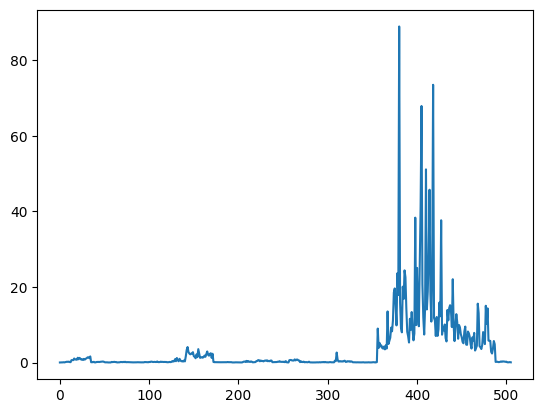

In [52]:
plt.plot(boston.crim)
plt.show()